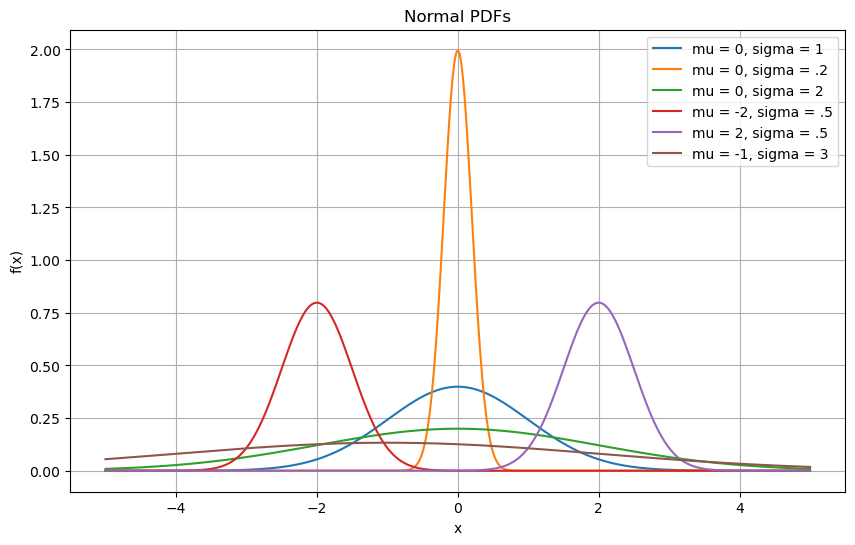

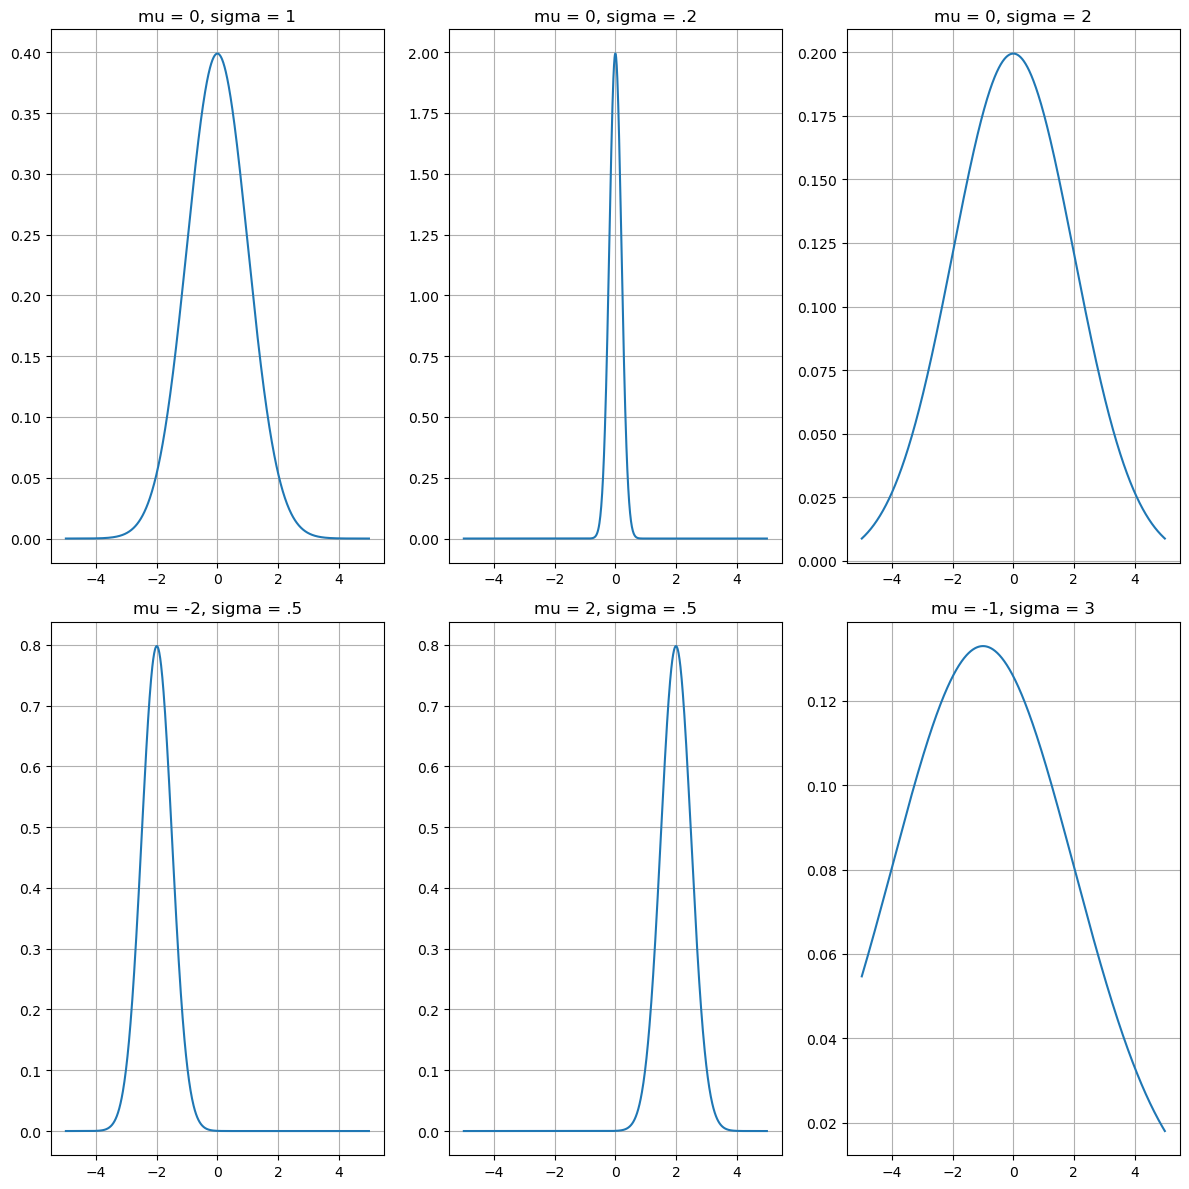

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

#Define normal_pdf function to compute normal PDFs:
def normal_pdf(x, mu, sigma):
    coeff = 1 / (sigma * np.sqrt(2 * np.pi))
    exp = np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return coeff * exp

#Generate x values:
x = np.linspace(-5, 5, 1000)

#Plot all pdfs on the same graph:
plt.figure(figsize=(10, 6))
plt.plot(x, normal_pdf(x, 0, 1), label='mu = 0, sigma = 1')
plt.plot(x, normal_pdf(x, 0, .2), label='mu = 0, sigma = .2')
plt.plot(x, normal_pdf(x, 0, 2), label='mu = 0, sigma = 2')
plt.plot(x, normal_pdf(x, -2, .5), label='mu = -2, sigma = .5')
plt.plot(x, normal_pdf(x, 2, .5), label='mu = 2, sigma = .5')
plt.plot(x, normal_pdf(x, -1, 3), label='mu = -1, sigma = 3')
plt.title('Normal PDFs')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

#Plot the pdfs separately:
fig, axs = plt.subplots(2, 3, figsize=(12, 12))
axs[0, 0].plot(x, normal_pdf(x, 0, 1))
axs[0, 0].set_title('mu = 0, sigma = 1')
axs[0, 0].grid()
axs[0, 1].plot(x, normal_pdf(x, 0, .2))
axs[0, 1].set_title('mu = 0, sigma = .2')
axs[0, 1].grid()
axs[0, 2].plot(x, normal_pdf(x, 0, 2))
axs[0, 2].set_title('mu = 0, sigma = 2')
axs[0, 2].grid()    
axs[1, 0].plot(x, normal_pdf(x, -2, .5))
axs[1, 0].set_title('mu = -2, sigma = .5')
axs[1, 0].grid()
axs[1, 1].plot(x, normal_pdf(x, 2, .5))
axs[1, 1].set_title('mu = 2, sigma = .5')
axs[1, 1].grid()
axs[1, 2].plot(x, normal_pdf(x, -1, 3))
axs[1, 2].set_title('mu = -1, sigma = 3')
axs[1, 2].grid()
plt.tight_layout()
plt.show()

In [ ]:
def random_upper_matrix(n, low=-3, high=3):
    #Generates a random upper triangular matrix of size n x n

    a = np.random.randint(low, high, size=(n, n))
    a = np.triu(a) 
    for i in range(n):
        if a[i, i] == 0:
            a[i, i] = np.random.randint(1, high)
    return a


def lu_decomposition(a):
    #Decomposes matrix A into L and U 
    
    n = len(a)
    L = np.zeros((n, n))
    U = np.zeros((n, n))
    A = np.array(a, dtype=float)
    
    #Set diagonal of L to 1
    for i in range(n):
        L[i, i] = 1.0
    
    for i in range(n):
        #Compute rows of U
        for j in range(i, n):
            sum_val = sum(L[i, k] * U[k, j] for k in range(i))
            U[i, j] = A[i, j] - sum_val
            
        #Compute columns of L 
        for j in range(i + 1, n):
            sum_val = sum(L[j, k] * U[k, i] for k in range(i))
            if U[i, i] == 0:
                print("Cannot perform LU decomp, divide by zero")
            L[j, i] = (A[j, i] - sum_val) / U[i, i]
    
    return L, U

#Test LU decomposition:
a = random_upper_matrix(5)
b = random_upper_matrix(5)
c = a.T @ b
L, U = lu_decomposition(c)
print(np.allclose(L @ U, c))

def forward_substitution(l, b):
    #Solves Ly = b using forward substitution
    n = l.shape[0]
    y = np.zeros(n)
    
    for i in range(n):
        sum_val = sum(l[i, j] * y[j] for j in range(i))
        y[i] = (b[i] - sum_val) / l[i, i]
        
    return y

def backward_substitution(u, y):
    #Solves Ux = y using backward substitution
    n = u.shape[0]
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        sum_val = sum(u[i, j] * x[j] for j in range(i+1, n))
        x[i] = (y[i] - sum_val) / u[i, i]
        
    return x

def solve_linear_system(a, b):
    #Combines previous functions to solve Ax = b
    
    L, U = lu_decomposition(a)
    y = forward_substitution(L, b)
    x = backward_substitution(U, y)
    return x

#Test linear system solver
a1 = random_upper_matrix(10)
a2 = random_upper_matrix(10)
a = a1.T @ a2
b = np.random.randint(-10, 10, size=10)
x = solve_linear_system(a, b)
print(np.allclose(a @ x, b))

True
True


Testing matrix size: 100
Testing matrix size: 110
Testing matrix size: 120
Testing matrix size: 130
Testing matrix size: 140
Testing matrix size: 150
Testing matrix size: 160
Testing matrix size: 170
Testing matrix size: 180
Testing matrix size: 190
Testing matrix size: 200
Testing matrix size: 210
Testing matrix size: 220
Testing matrix size: 230
Testing matrix size: 240
Testing matrix size: 250
Testing matrix size: 260
Testing matrix size: 270
Testing matrix size: 280
Testing matrix size: 290
Testing matrix size: 300
Testing matrix size: 310
Testing matrix size: 320
Testing matrix size: 330
Testing matrix size: 340
Testing matrix size: 350
Testing matrix size: 360
Testing matrix size: 370
Testing matrix size: 380
Testing matrix size: 390
Testing matrix size: 400
Testing matrix size: 410
Testing matrix size: 420
Testing matrix size: 430
Testing matrix size: 440
Testing matrix size: 450
Testing matrix size: 460
Testing matrix size: 470
Testing matrix size: 480
Testing matrix size: 490


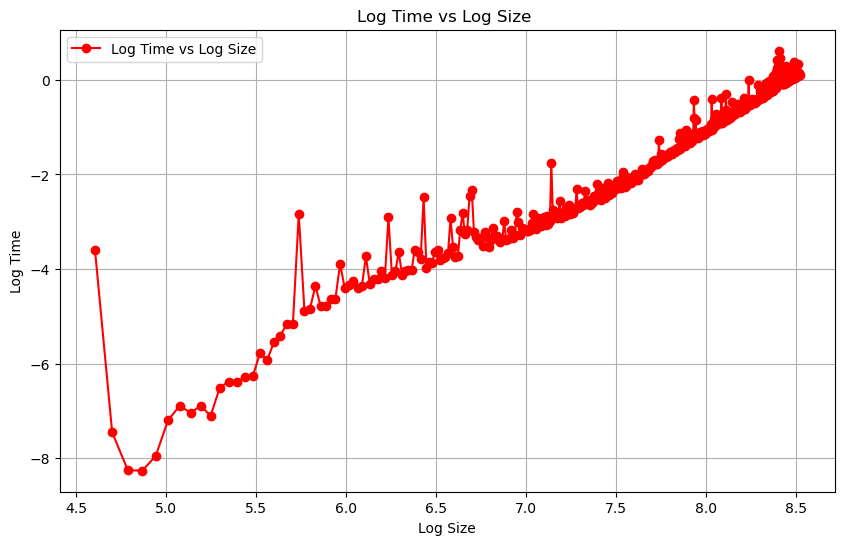

In [ ]:
import time 
from scipy.linalg import lu 

start_size = 100 
end_size = 10000
step_size = 10
sizes = range(start_size, end_size + 1, step_size) 
times = [] 
low = -10
high = 10

#Loop through, make random n x n matrix, do the LU decomp, time it, and store it
for n in sizes: 
    print(f"Testing matrix size: {n}")
    random_matrix = np.random.randint(low, high, size=(n, n))
    time1 = time.perf_counter()
    P, L, U = lu(random_matrix)
    time2 = time.perf_counter()
    times.append(time2-time1)
    
#Take the logs
log_sizes = np.log(sizes) 
log_times = np.log(times)
    

#Log plot:
plt.figure(figsize=(10, 6))
plt.plot(log_sizes, log_times, 'r-o', label='Log Time vs Log Size')
plt.xlabel('Log Size')
plt.ylabel('Log Time')
plt.title('Log Time vs Log Size ')
plt.grid(True)
plt.legend()
plt.show()


The plot above seems to show a linear relationship in log-log space, implying the O(N^3) time complexity we expect from the LU decomposition algorithm. However, we do see a few outliers, especially for the first few, where there seems to be high variance in the amount of time taken, but as we get into larger sizes, the graph smooths greatly and the trend can be seen. 